In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import warnings
warnings.filterwarnings('ignore') 

In [3]:
df = pd.read_csv('Churn.csv')
df.head()

,Customer ID,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,7590-VHVEA,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.isnull().sum()

Customer ID          0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
tenure               0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn                0
dtype: int64

In [6]:
df.dtypes

Customer ID           object
Gender                object
Senior Citizen         int64
Partner               object
Dependents            object
tenure                 int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn                 object
dtype: object

In [7]:
#Convert 'TotalCharges' to numeric, forcing errors to NaN
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')
df.dropna(subset=['Total Charges'], inplace=True)
    
df.dtypes

Customer ID           object
Gender                object
Senior Citizen         int64
Partner               object
Dependents            object
tenure                 int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges        float64
Churn                 object
dtype: object

In [8]:
#Pre process data

# Drop the Customer ID column
df.drop("Customer ID", axis=1, inplace=True)

# Convert 'Total Charges' to numeric, coerce errors (e.g., empty strings)
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')
df['Total Charges'].fillna(df['Total Charges'].median(), inplace = True)

# Drop rows with missing values
#df.dropna(inplace=True)

#Handling categorical values
# Encode categorical features (except the target)
for col in df.select_dtypes(include="object").columns:
    if col != "Churn":
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

# Encode target variab
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7033 entries, 0 to 7043
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             7033 non-null   int64  
 1   Senior Citizen     7033 non-null   int64  
 2   Partner            7033 non-null   int64  
 3   Dependents         7033 non-null   int64  
 4   tenure             7033 non-null   int64  
 5   Phone Service      7033 non-null   int64  
 6   Multiple Lines     7033 non-null   int64  
 7   Internet Service   7033 non-null   int64  
 8   Online Security    7033 non-null   int64  
 9   Online Backup      7033 non-null   int64  
 10  Device Protection  7033 non-null   int64  
 11  Tech Support       7033 non-null   int64  
 12  Streaming TV       7033 non-null   int64  
 13  Streaming Movies   7033 non-null   int64  
 14  Contract           7033 non-null   int64  
 15  Paperless Billing  7033 non-null   int64  
 16  Payment Method     7033 non-n

In [10]:
# Feature Scaling and Splitting

# Split features and target
X = df.drop("Churn", axis=1)
y = df["Churn"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [11]:
#Build the TensorFlow Model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,185 (4.63 KB)

 Trainable params: 1,185 (4.63 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Train the Model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.6858 - loss: 0.5771 - val_accuracy: 0.7895 - val_loss: 0.4363
Epoch 2/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7732 - loss: 0.4577 - val_accuracy: 0.8020 - val_loss: 0.4189
Epoch 3/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7980 - loss: 0.4216 - val_accuracy: 0.8073 - val_loss: 0.4133
Epoch 4/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8047 - loss: 0.4142 - val_accuracy: 0.8099 - val_loss: 0.4123
Epoch 5/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8047 - loss: 0.4133 - val_accuracy: 0.8126 - val_loss: 0.4061
Epoch 6/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8052 - loss: 0.4211 - val_accuracy: 0.8117 - val_loss: 0.4058
Epoch 7/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8039 - loss: 0.4165 - val_accuracy: 0.8117 - val_loss: 0.4052
Epoch 8/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8056 - loss: 0.4120 - val_accura

In [13]:
# Evaluate and Predict

# Evaluate on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

# Predict (returns probabilities)
predictions = model.predict(X_test)
predicted_labels = (predictions > 0.5).astype("int32")

# Show first 10 predictions
print(predicted_labels[:10].flatten())


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7747 - loss: 0.4379
Test Accuracy: 0.79
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
[0 0 0 1 1 1 1 0 0 0]


In [16]:
#Save and Reload the Model

# Save the model
model.save("churn_model.h5")

# Reload it
loaded_model = tf.keras.models.load_model("churn_model.h5")

# Test reloaded model
loss, accuracy = loaded_model.evaluate(X_test, y_test)
print("\n")
print(f"Reloaded Model Accuracy: {accuracy:.2f}")


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7747 - loss: 0.4379


Reloaded Model Accuracy: 0.79


Churn
0    5164
1    1869
Name: count, dtype: int64


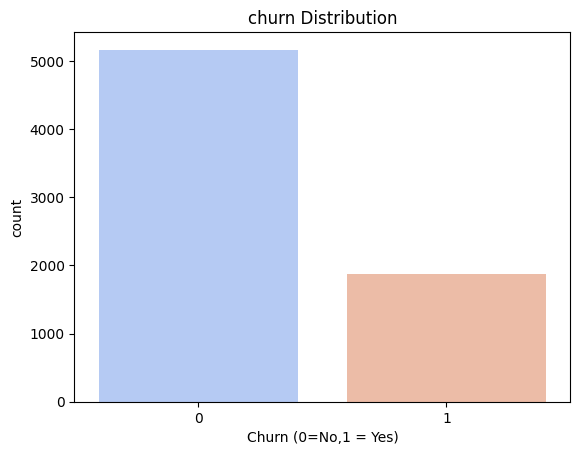

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
print(df['Churn'].value_counts())
sns.countplot(x='Churn',data=df,palette='coolwarm')
plt.title('churn Distribution')
plt.xlabel('Churn (0=No,1 = Yes)')
plt.ylabel('count')
plt.show()

Gender
1    3549
0    3484
Name: count, dtype: int64


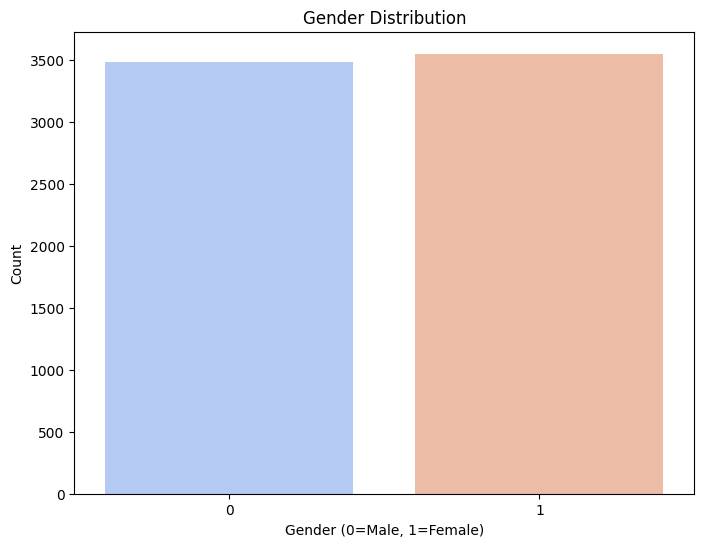

In [18]:
plt.figure(figsize=(8, 6))
print(df['Gender'].value_counts())
sns.countplot(x='Gender', data=df, palette='coolwarm')
plt.title('Gender Distribution')
plt.xlabel('Gender (0=Male, 1=Female)')
plt.ylabel('Count')
plt.show()

Senior Citizen
0    5891
1    1142
Name: count, dtype: int64


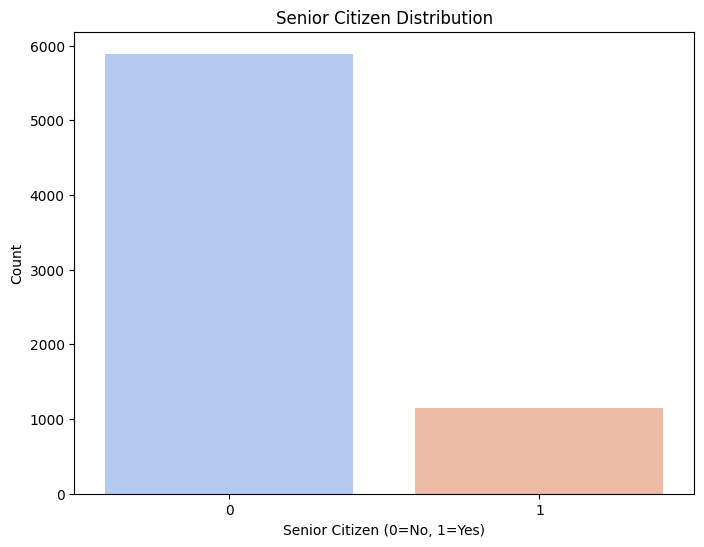

In [19]:
plt.figure(figsize=(8, 6))
print(df['Senior Citizen'].value_counts())
sns.countplot(x='Senior Citizen', data=df, palette='coolwarm')
plt.title('Senior Citizen Distribution')
plt.xlabel('Senior Citizen (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()

In [20]:
#Random forest classifier

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [30]:
#Evaluate the model

from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.78


In [34]:
#Is model accuracy of 0.78 good or?
#it is good, but we can improve it further by tuning hyperparameters or using more advanced models.

#What are hyperparameters?
#Hyperparameters are the parameters that are set before the learning process begins. 
# They control the training process and the structure of the model. 
# Examples include learning rate, number of trees in a random forest, and number of layers in a neural network.

#Confusion Matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix: {conf_matrix}")

Confusion Matrix: [[926 116]
 [187 178]]


In [35]:
#What is a confusion matrix?
#A confusion matrix is a table used to evaluate the performance of a classification model.
#What does the confusion matrix tell us?
#It shows the number of true positive, true negative, false positive, and false negative predictions
#[[926 116]
#[187 178]]
#What does this mean?
#In this confusion matrix:
# - 926 customers were correctly predicted as not churning (True Negatives).
# - 178 customers were correctly predicted as churning (True Positives).
# - 116 customers were incorrectly predicted as churning (False Positives).
# - 187 customers were incorrectly predicted as not churning (False Negatives).

#What is a Classification Report?
#A classification report is a summary of the precision, recall, F1-score, and support for each class in a classification problem.
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1042
           1       0.61      0.49      0.54       365

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.78      1407



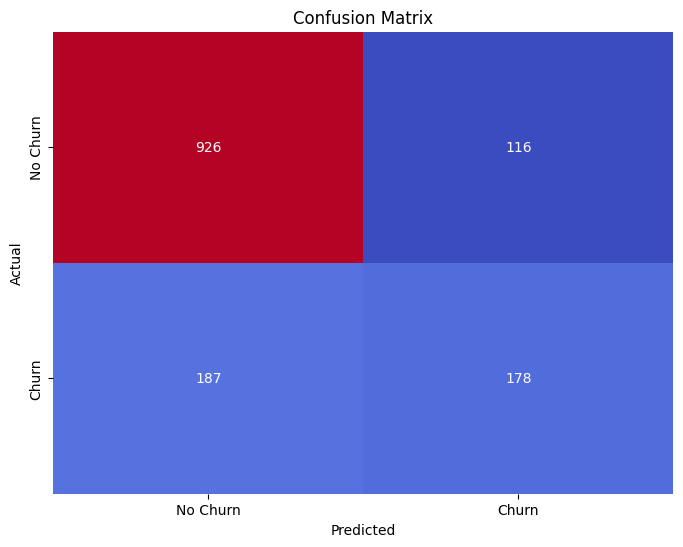

In [39]:
#visalze confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', 
              cbar=False,
              xticklabels=['No Churn', 'Churn'], 
              yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()